<a href="https://colab.research.google.com/github/maryem012/HotelWebApp/blob/main/lettuce_disease_detection_using_yolov8_(v1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git config --global user.email "mariambenayed@outlook.com"
!git config --global user.name "maryem012"


In [2]:
!git clone https://github.com/Jenifen/greeny_ai.git


Cloning into 'greeny_ai'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0zqHZcw5Gklen8CSZkm1")
project = rf.workspace("greenysolutions-okjug").project("lettuce-project-qe6i9")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to lettuce-project-1 in yolov8:: 100%|██████████| 19389/19389 [00:04<00:00, 4228.97it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO

# Load a better YOLOv8 model
model = YOLO("yolov8m.pt")
results = model.train(
    data="/content/lettuce-project-1/data.yaml",  # Path to your dataset configuration
    epochs=100,                         # More epochs for better convergence
    batch=32,                            # Larger batch size for stability (Reduce if RAM < 16GB)
    imgsz=640,                           # Image size: 640 is optimal, but try 960 for more detail
    patience=10,                         # Stops early if no improvement in 10 epochs
    optimizer="AdamW",                   # Better optimizer than SGD for YOLO
    lr0=0.001,                           # Initial learning rate
    lrf=0.0001,                          # Final learning rate
    warmup_epochs=3,                     # Gradual LR increase to stabilize training
    warmup_momentum=0.9,                 # Momentum for warmup
    weight_decay=0.0005,                 # Prevents overfitting
    augment=True,                         # Enables built-in augmentations
    hsv_h=0.015,                          # Hue augmentation
    hsv_s=0.7,                            # Saturation augmentation
    hsv_v=0.4,                            # Value augmentation
    mosaic=1.0,                           # Enables mosaic augmentation
    mixup=0.2,                            # Mixup augmentation (blending images)
    dropout=0.2,                          # Helps prevent overfitting
    workers=4,                            # Speed up data loading
    device="cuda"                         # Ensure GPU acceleration
)


100%|██████████| 49.7M/49.7M [00:00<00:00, 235MB/s]


Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/lettuce-project-1/data.yaml, epochs=100, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 755k/755k [00:00<00:00, 23.6MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 89.6MB/s]


AMP: checks passed ✅


train: Scanning /content/lettuce-project-1/train/labels... 9072 images, 13 backgrounds, 0 corrupt: 100%|██████████| 9072/9072 [00:04<00:00, 2267.96it/s]

train: WARNING ⚠️ /content/lettuce-project-1/train/images/-1-_jpg.rf.a27fe0689f5f89fe620fa75d2b264c04.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/lettuce-project-1/train/images/-3-_jpg.rf.8e6af70dca27fa29ab442a608f42aeb7.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/lettuce-project-1/train/images/-6-_jpg.rf.8aeb08fa7442aed83febc6399381a045.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/lettuce-project-1/train/images/-6-_jpg.rf.c60a61f14b9e36dbf8d7fcee8ac0f307.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/lettuce-project-1/train/images/-8-_jpg.rf.c5216789abf3f49033b543b53641dd91.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/lettuce-project-1/train/images/-9-_jpg.rf.168e78099b7333d63e5705c56e0aacaf.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/lettuce-project-1/train/images/-9-_jpg.rf.ed66a391bf919696c84dbc41b938cfa2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/lettuce-project-1/train/images/-_jp

train: New cache created: /content/lettuce-project-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: '2.0.4' (you have '2.0.3'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/lettuce-project-1/valid/labels... 396 images, 0 backgrounds, 0 corrupt: 100%|██████████| 396/396 [00:00<00:00, 757.73it/s]

val: New cache created: /content/lettuce-project-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      13.6G     0.6515      1.783      1.252        101        640: 100%|██████████| 284/284 [05:03<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.06s/it]

                   all        396        585      0.265      0.386       0.22     0.0872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      13.5G     0.6279      1.581      1.231        104        640: 100%|██████████| 284/284 [05:00<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]

                   all        396        585      0.452      0.536      0.454      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      13.6G     0.5936      1.475      1.209        100        640: 100%|██████████| 284/284 [04:59<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]

                   all        396        585      0.377      0.438      0.384      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      13.6G     0.5713      1.424      1.195        142        640: 100%|██████████| 284/284 [04:58<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


                   all        396        585      0.538      0.491       0.51      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      13.6G     0.5384      1.342      1.176        127        640: 100%|██████████| 284/284 [04:58<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


                   all        396        585      0.665       0.54      0.591      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      13.6G     0.5177      1.269      1.159        126        640: 100%|██████████| 284/284 [04:58<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


                   all        396        585       0.63      0.572      0.633      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      13.6G     0.5022      1.231       1.15        130        640: 100%|██████████| 284/284 [04:57<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


                   all        396        585      0.532      0.541      0.568      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      13.6G     0.4988      1.194       1.15         94        640: 100%|██████████| 284/284 [04:57<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


                   all        396        585      0.672      0.597      0.595      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      13.6G     0.4868       1.15      1.138        111        640: 100%|██████████| 284/284 [04:57<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


                   all        396        585       0.68      0.636      0.693      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      13.4G     0.4906      1.137      1.139         98        640: 100%|██████████| 284/284 [04:58<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


                   all        396        585      0.665      0.605       0.67      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      13.5G     0.4627      1.094      1.122        125        640: 100%|██████████| 284/284 [04:57<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

                   all        396        585      0.745      0.653       0.73      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      13.6G     0.4656      1.086      1.122        119        640: 100%|██████████| 284/284 [04:58<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


                   all        396        585      0.765      0.643      0.739      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      13.6G     0.4658      1.075       1.12         80        640: 100%|██████████| 284/284 [04:57<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


                   all        396        585      0.712      0.571      0.681      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      13.6G     0.4486      1.039      1.112        119        640: 100%|██████████| 284/284 [04:57<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]

                   all        396        585       0.64      0.609      0.632       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      13.5G     0.4499      1.026       1.11        136        640: 100%|██████████| 284/284 [04:57<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]

                   all        396        585      0.768      0.623      0.719      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      13.6G     0.4365      0.998        1.1        104        640: 100%|██████████| 284/284 [04:57<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]

                   all        396        585      0.695      0.589      0.679      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      13.6G     0.4423     0.9945      1.103        111        640: 100%|██████████| 284/284 [04:57<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


                   all        396        585      0.726      0.658      0.727      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      13.6G     0.4337     0.9753      1.096        138        640: 100%|██████████| 284/284 [04:57<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

                   all        396        585      0.763      0.732      0.778      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      13.6G     0.4297     0.9448      1.094        120        640: 100%|██████████| 284/284 [04:57<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]


                   all        396        585      0.893      0.713      0.845      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      13.6G     0.4255     0.9471      1.091        116        640: 100%|██████████| 284/284 [04:57<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.17it/s]

                   all        396        585      0.826      0.693      0.776      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      13.6G     0.4192     0.9175      1.082         94        640: 100%|██████████| 284/284 [04:57<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


                   all        396        585        0.8       0.65      0.732      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      13.6G     0.4164     0.9127      1.081        109        640: 100%|██████████| 284/284 [04:56<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


                   all        396        585      0.889      0.742      0.838        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      13.6G     0.4098     0.9051      1.077        119        640: 100%|██████████| 284/284 [04:56<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


                   all        396        585       0.76      0.657      0.746      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      13.6G     0.4073     0.8821      1.072        110        640: 100%|██████████| 284/284 [04:56<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


                   all        396        585      0.862      0.746      0.827      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      13.6G        inf     0.8754      1.072        134        640: 100%|██████████| 284/284 [04:56<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


                   all        396        585      0.855      0.715      0.819      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      13.6G     0.4032     0.8727      1.072        132        640: 100%|██████████| 284/284 [04:56<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]

                   all        396        585      0.827       0.78      0.823      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      13.5G        0.4     0.8642      1.067        115        640: 100%|██████████| 284/284 [04:56<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]

                   all        396        585      0.759      0.761       0.82      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      13.6G     0.4069     0.8618      1.072         93        640: 100%|██████████| 284/284 [04:56<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


                   all        396        585      0.826      0.731      0.817      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      13.6G      0.396     0.8489      1.065        126        640: 100%|██████████| 284/284 [04:57<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]

                   all        396        585      0.846      0.735       0.83      0.603
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 19, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



29 epochs completed in 2.479 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.98s/it]


                   all        396        585       0.93      0.754      0.887      0.675
             Bacterial        113        134      0.942      0.896      0.977      0.723
          Downy_mildew         69         75      0.973       0.64      0.836      0.654
    Leaf Spots Blights         67         73      0.938      0.825      0.959      0.804
        Powdery_mildew         61         73      0.866      0.548      0.734      0.511
               healthy         89        230      0.934      0.862      0.926      0.681
Speed: 0.3ms preprocess, 25.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt' conf=0.25 source='/content/lettuce-project-1/test/images'


Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs

image 1/221 /content/lettuce-project-1/test/images/-2-_jpg.rf.0558f97d68bda582834e9c4b4f190c31.jpg: 640x640 1 Downy_mildew, 37.0ms
image 2/221 /content/lettuce-project-1/test/images/-2-_jpg.rf.b09a1c13e98f8c9ab95c237a726dcc07.jpg: 640x640 1 Downy_mildew, 37.0ms
image 3/221 /content/lettuce-project-1/test/images/-2-_jpg.rf.b0b4ac566f90c43306ae3cb8bd0ee505.jpg: 640x640 1 Downy_mildew, 36.9ms
image 4/221 /content/lettuce-project-1/test/images/-2-_jpg.rf.fb561b190a1f2342f824dff9ba399558.jpg: 640x640 1 Powdery_mildew, 36.9ms
image 5/221 /content/lettuce-project-1/test/images/-6-_jpg.rf.4f7b8284cd086aecb4fdd905ad4d0566.jpg: 640x640 1 Leaf Spots Blights, 37.0ms
image 6/221 /content/lettuce-project-1/test/images/-8-_jpg.rf.0386cbf625ca1c0fc4886363cc4036b2.jpg: 640x640 (no detections), 36.6ms
image 7/221 /content/lettuce-project-1/

In [ ]:
!yolo task=detect mode=val model='/content/runs/detect/train/weights/best.pt' conf=0.25 data='/content/lettuce-project-1/data.yaml'


Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/lettuce-project-1/valid/labels.cache... 396 images, 0 backgrounds, 0 corrupt: 100% 396/396 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 25/25 [00:12<00:00,  2.03it/s]
                   all        396        585       0.89      0.713      0.829       0.65
             Bacterial        113        134       0.93      0.828      0.904      0.684
          Downy_mildew         69         75      0.904        0.5      0.738      0.611
    Leaf Spots Blights         67         73       0.85      0.904      0.908      0.756
        Powdery_mildew         61         73       0.81      0.548      0.699      0.537
               healthy         89        230      0.959      0.787      0.894      0.662
Speed: 1.4ms preprocess, 24.2ms inference, 0

In [ ]:
!yolo task=detect mode=val model='/content/runs/detect/train/weights/best.pt' data='/content/lettuce-project-1/data.yaml' save_conf


Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/lettuce-project-1/valid/labels.cache... 396 images, 0 backgrounds, 0 corrupt: 100% 396/396 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 25/25 [00:11<00:00,  2.13it/s]
                   all        396        585       0.89      0.713      0.845      0.605
             Bacterial        113        134       0.93      0.828      0.938       0.65
          Downy_mildew         69         75      0.904        0.5      0.763      0.568
    Leaf Spots Blights         67         73       0.85      0.904       0.91      0.716
        Powdery_mildew         61         73       0.81      0.548      0.707      0.468
               healthy         89        230      0.959      0.787      0.905      0.622
Speed: 0.3ms preprocess, 23.9ms inference, 0

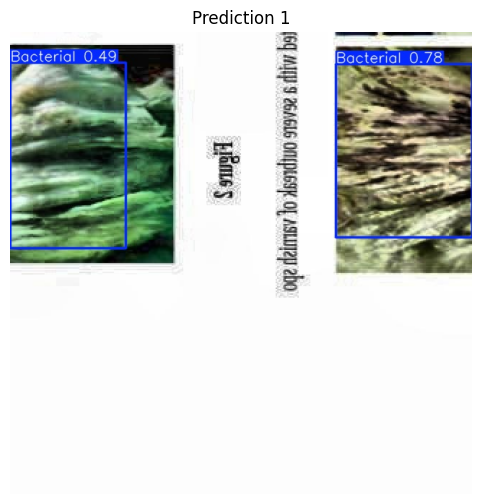

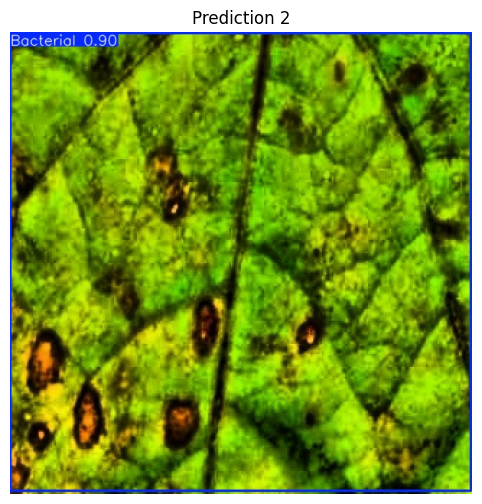

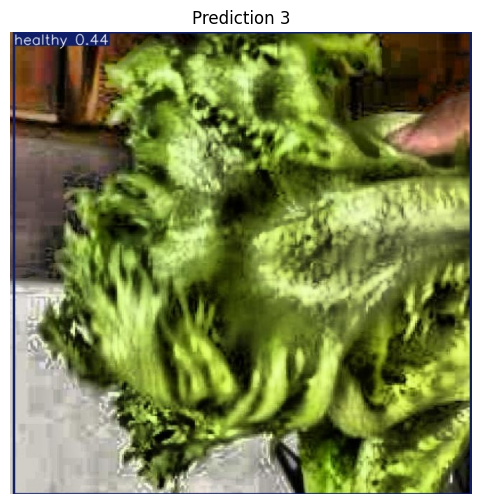

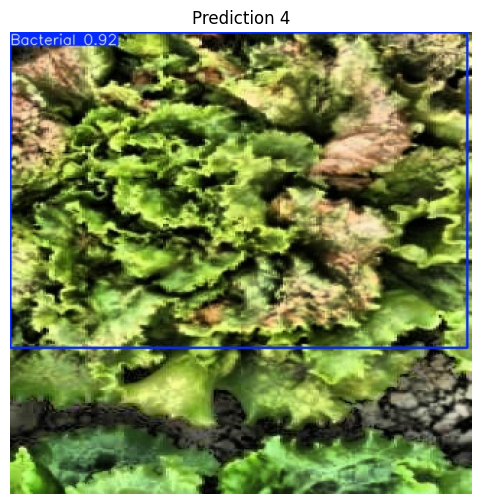

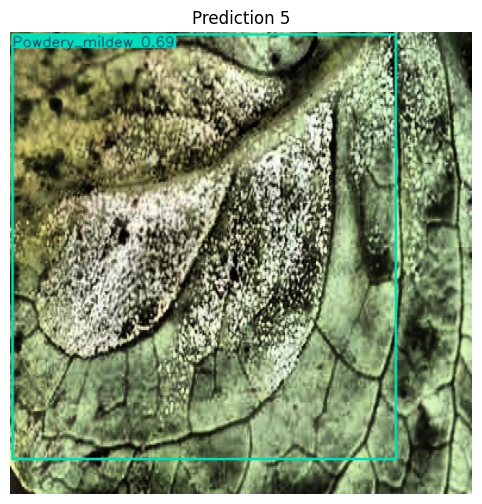

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

# Define the path where results are saved
results_path = "/content/runs/detect/predict/"

# Get all images from the results folder
image_files = [f for f in os.listdir(results_path) if f.endswith(('.jpg', '.png'))]

# Display a few images
for i, image_name in enumerate(image_files[:5]):  # Show first 5 images
    image_path = os.path.join(results_path, image_name)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Prediction {i+1}")
    plt.show()


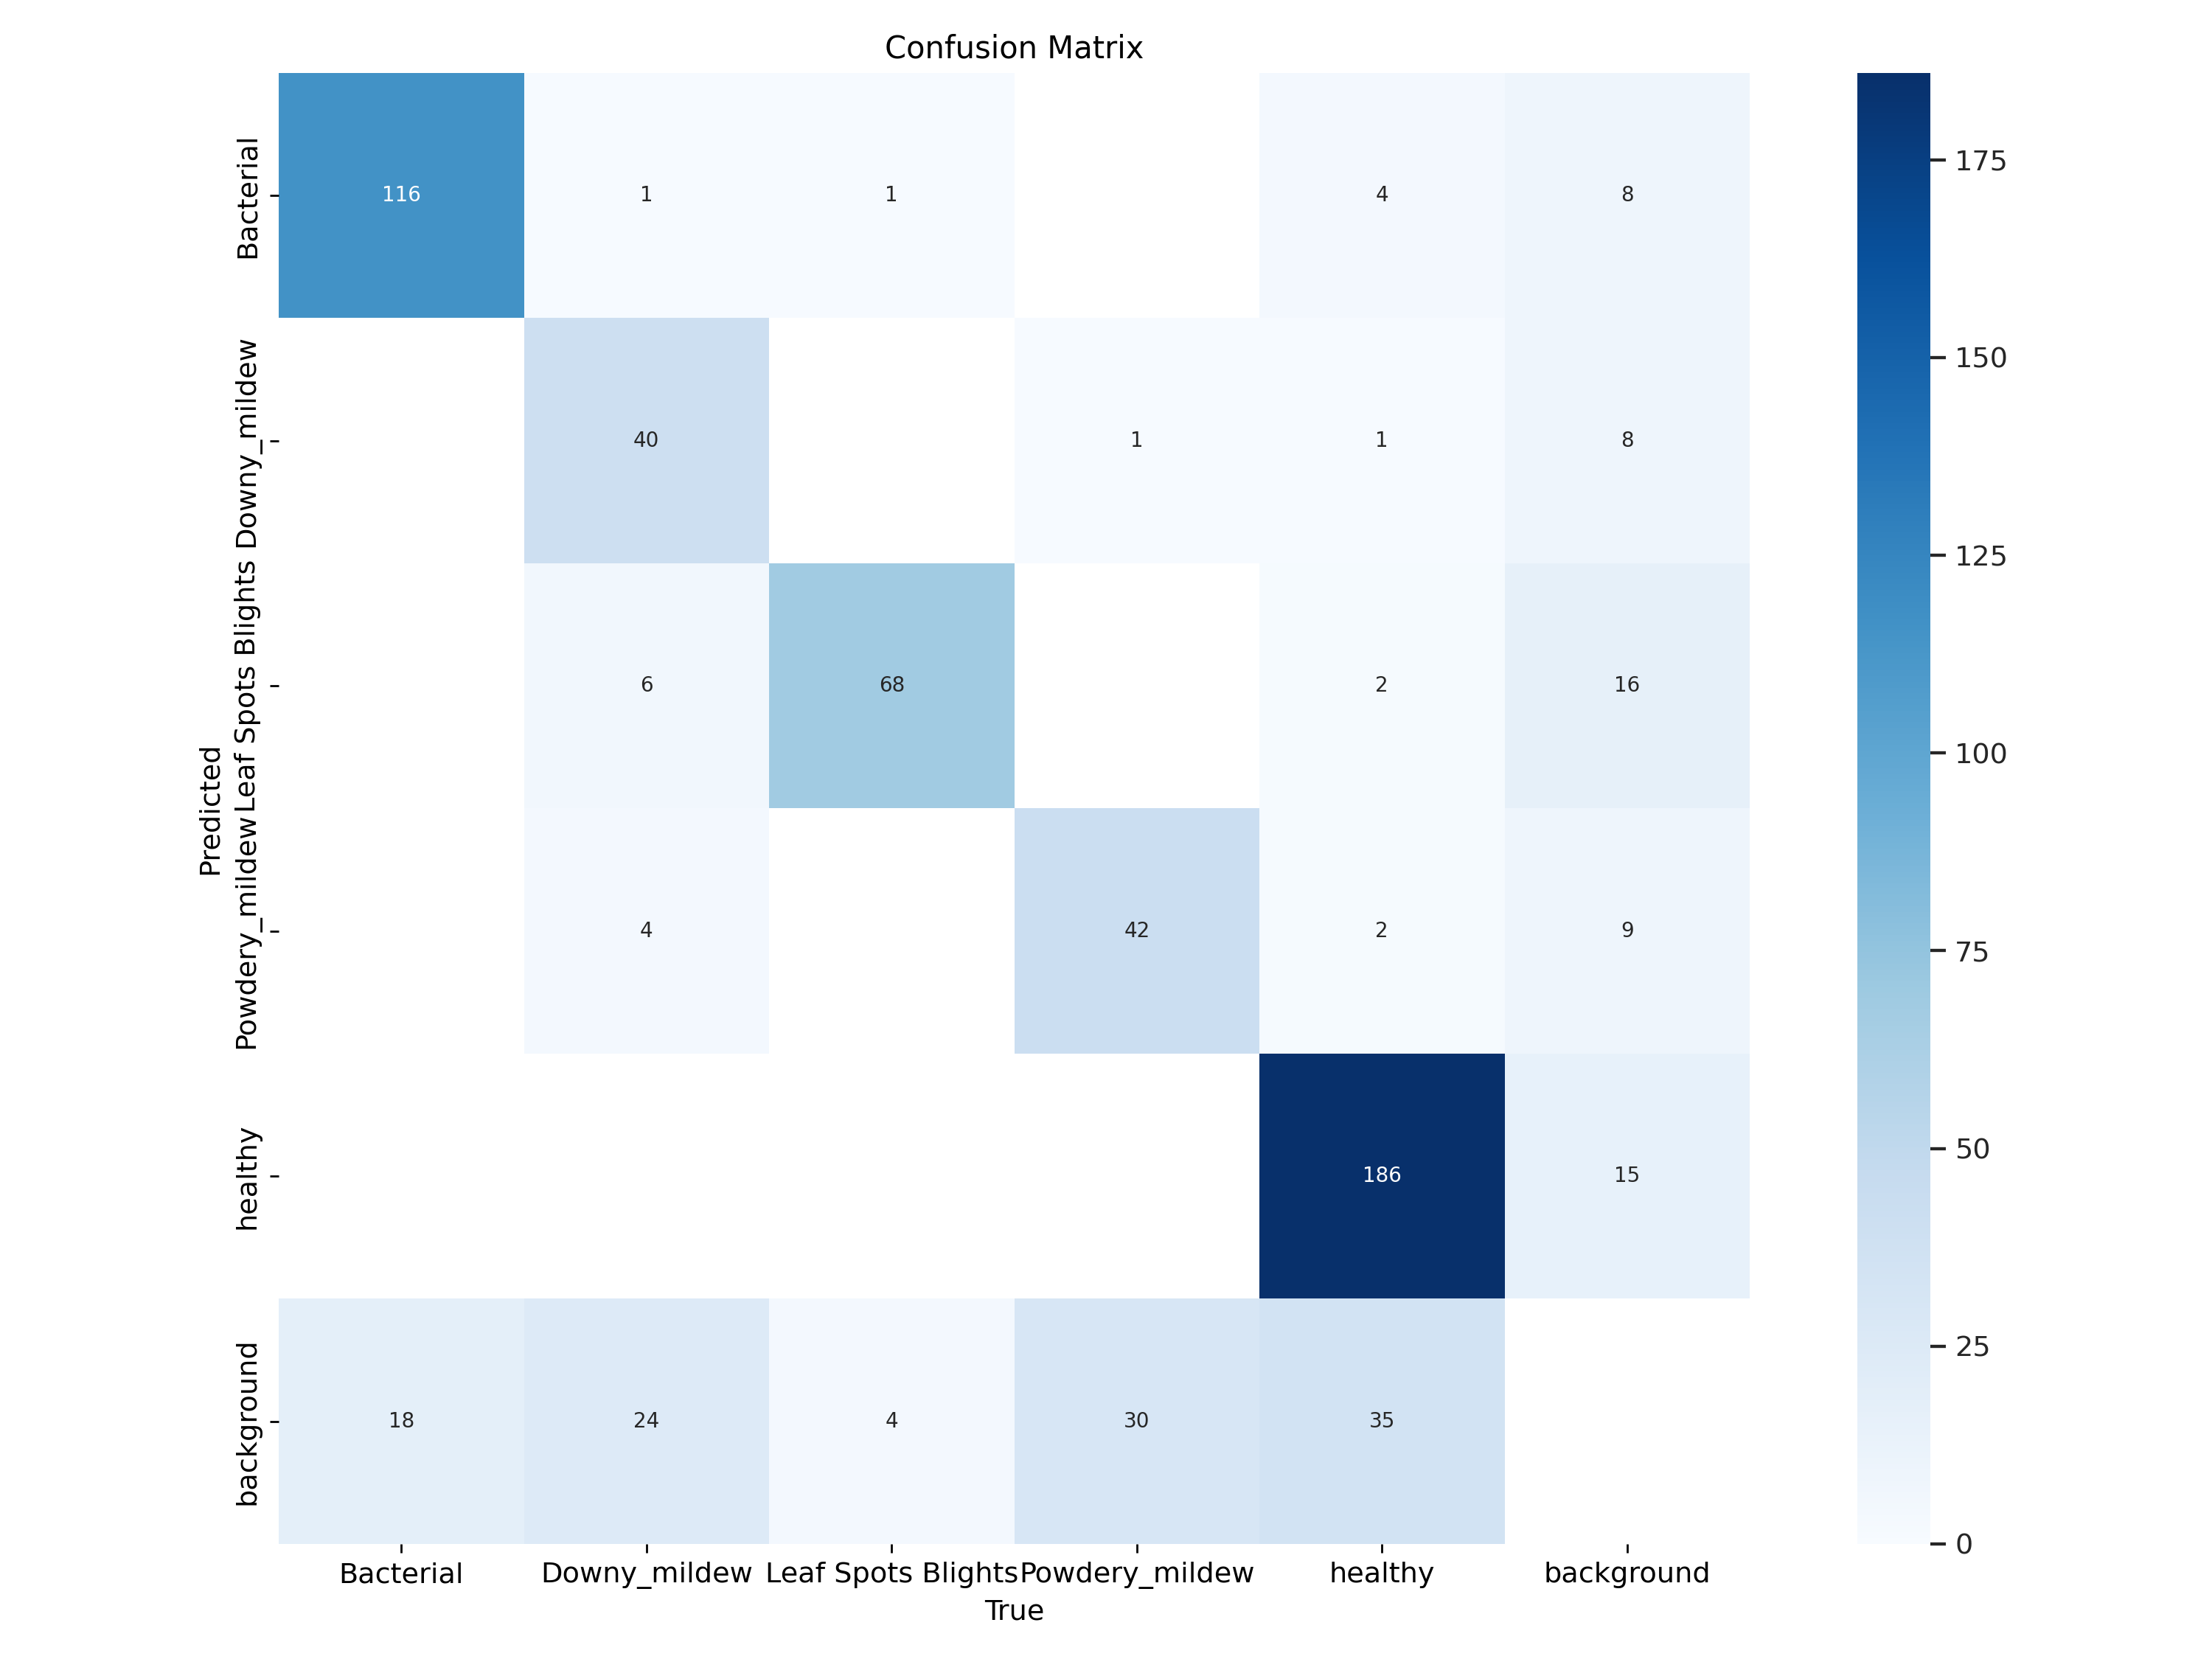

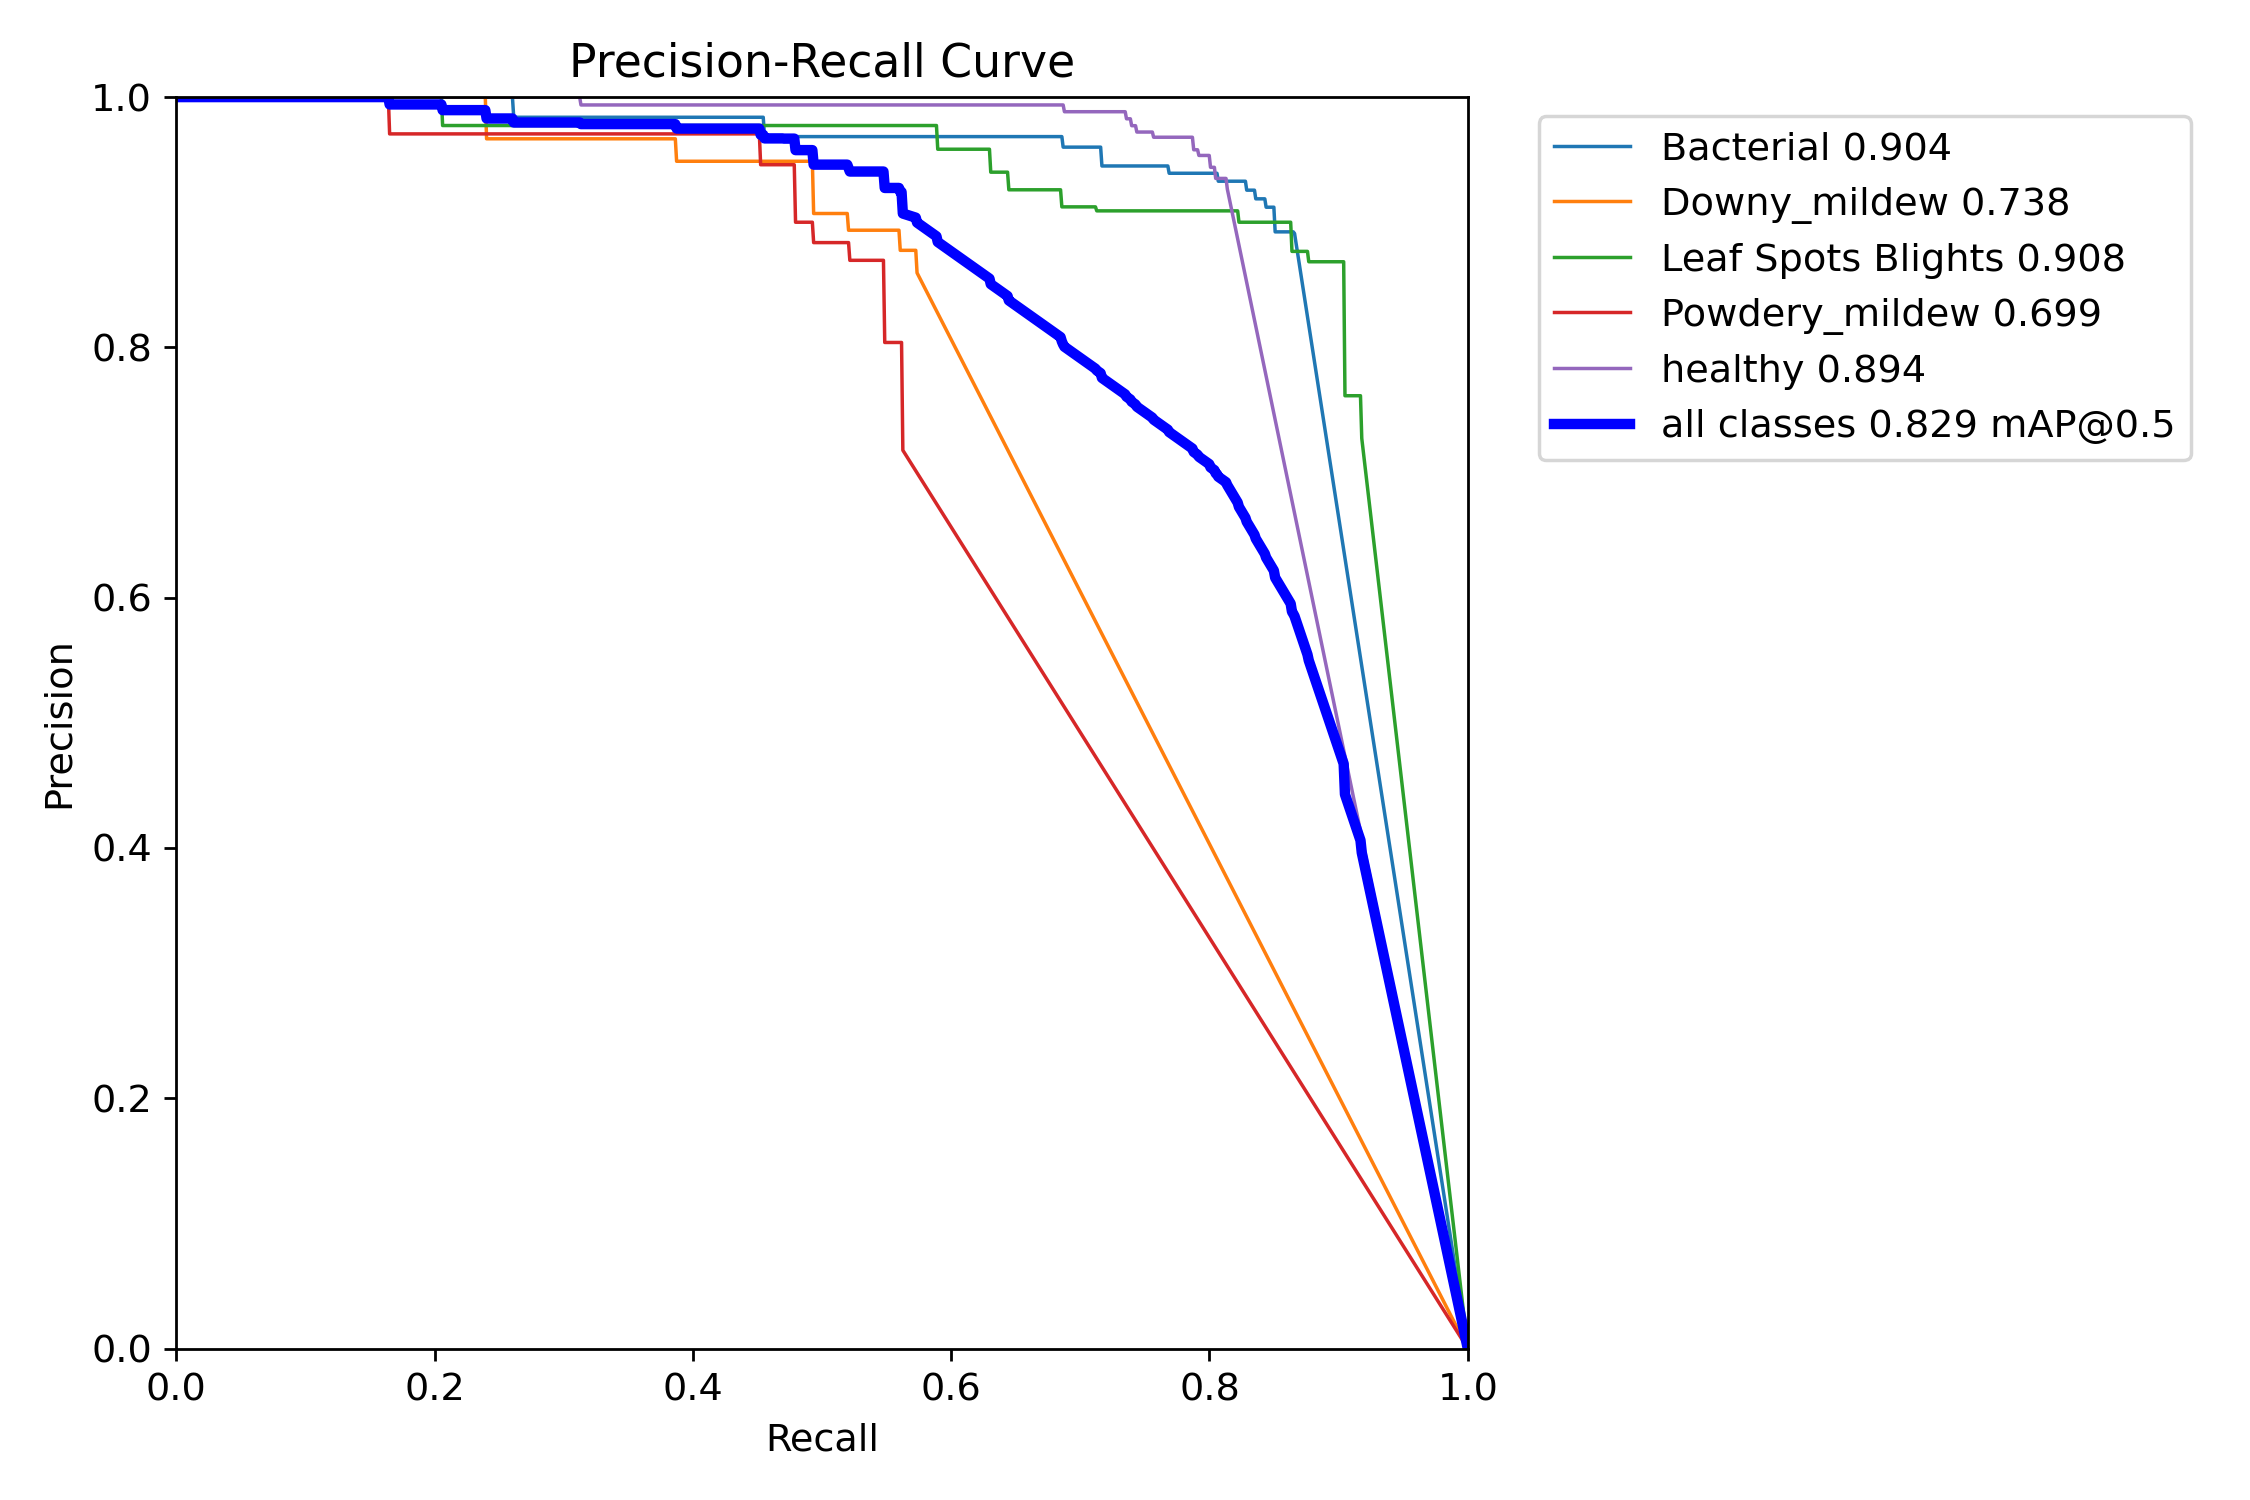

In [ ]:
from IPython.display import display
from PIL import Image

# Load and display confusion matrix
cm_path = "/content/runs/detect/val/confusion_matrix.png"
pr_curve_path = "/content/runs/detect/val/PR_curve.png"

display(Image.open(cm_path))  # Show confusion matrix
display(Image.open(pr_curve_path))  # Show Precision-Recall curve
